In [18]:
import tensorflow as tf
from PIL import Image
from tensorflow.keras import layers


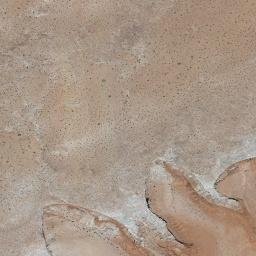

In [19]:
img=Image.open("D:\\python codes\\ML\\data1\\data\\desert\\desert(2).jpg")
img

In [20]:
data= tf.keras.utils.image_dataset_from_directory(
    "D:\\python codes\\ML\\data1\\data",
    image_size=(64,64),
    color_mode="rgb",
    batch_size=5000
)

Found 5631 files belonging to 4 classes.


In [21]:
cnn_model=tf.keras.Sequential([
    layers.Conv2D(9,3,padding="same",activation="leaky_relu",input_shape=(64,64,3)),
    layers.MaxPool2D(),
    layers.Conv2D(18,3,padding="same",activation="leaky_relu"),
    layers.MaxPool2D(),
    layers.Conv2D(36,3,padding="same",activation="leaky_relu"),
    layers.MaxPool2D(),
    layers.Flatten(),
    layers.Dense(64,activation="relu"),
    layers.Dense(10),
    layers.Softmax()
    
])

In [22]:
cnn_model.build(input_shape=(1,64,64,3))
cnn_model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_6 (Conv2D)           (None, 64, 64, 9)         252       
                                                                 
 max_pooling2d_6 (MaxPooling  (None, 32, 32, 9)        0         
 2D)                                                             
                                                                 
 conv2d_7 (Conv2D)           (None, 32, 32, 18)        1476      
                                                                 
 max_pooling2d_7 (MaxPooling  (None, 16, 16, 18)       0         
 2D)                                                             
                                                                 
 conv2d_8 (Conv2D)           (None, 16, 16, 36)        5868      
                                                                 
 max_pooling2d_8 (MaxPooling  (None, 8, 8, 36)        

In [23]:
cnn_model.compile(
    loss=tf.keras.losses.categorical_crossentropy,
    optimizer=tf.keras.optimizers.Adam(0.001),
    metrics=['accuracy']
 )

In [24]:
for features,labels in data:
    features=tf.divide(features,255)
    labels=tf.one_hot(labels,10)
    record=cnn_model.fit(features,labels,batch_size=50,epochs=10)
    print(features.shape, labels.shape)
    break

Epoch 1/10
100/100 [==============================] - 16s 136ms/step - loss: 0.5881 - accuracy: 0.7290
Epoch 2/10
100/100 [==============================] - 13s 135ms/step - loss: 0.2601 - accuracy: 0.8812
Epoch 3/10
100/100 [==============================] - 13s 134ms/step - loss: 0.2237 - accuracy: 0.8968
Epoch 4/10
100/100 [==============================] - 14s 135ms/step - loss: 0.2197 - accuracy: 0.9016
Epoch 5/10
100/100 [==============================] - 14s 137ms/step - loss: 0.1812 - accuracy: 0.9180
Epoch 6/10
100/100 [==============================] - 14s 136ms/step - loss: 0.1668 - accuracy: 0.9272
Epoch 7/10
100/100 [==============================] - 14s 136ms/step - loss: 0.1394 - accuracy: 0.9376
Epoch 8/10
100/100 [==============================] - 14s 138ms/step - loss: 0.1359 - accuracy: 0.9390
Epoch 9/10
100/100 [==============================] - 14s 136ms/step - loss: 0.1115 - accuracy: 0.9518
Epoch 10/10
100/100 [==============================] - 13s 134ms/step - l

In [26]:
model=cnn_model.save("satelite_img_pred.h5",save_format="h5")
model=tf.keras.models.load_model("satelite_img_pred.h5")